## Data Modeling in Python

As discussed in week one of this course,  we will be investigating how to develop various statistical models around data.

Modeling plays a significant role in data analysis and builds upon fundamental concepts of statistics.  By fitting models to data we are able to accomplish the following:

* __Estimate__ distributional properties of variables, potentially conditional on other variables.

* Concisely __summarize relationships__ between variables, and make inferential statements about those relationships.

* __Predict__ values of variables of interest conditional on values of other predictor varialbes, and characterize prediction uncertainty.

With these concepts in mind, we will overview modeling structure and carrying out exploratory data analysis on a dataset that contains information about homes in Boston, MA and how we may want to approach modeling prices of homes.

#### Import Libraries & Read in Data

To begin, let's import our libraries and dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from sklearn.datasets import load_boston
boston_dataset = load_boston() 

boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

boston["MEDV"] = boston_dataset.target

#### Investigate Dataset

Now that we have loaded our dataset, let's get a feel for what data our data looks like:

In [2]:
boston.shape

(506, 14)

Based on the above output, we have 506 observations and 14 columns.  To get a better sense of the data, let's print column names:

In [3]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Now that we've seen our various columns, lets take a look at what each column represents:

* __CRIM:__ Per capita crime rate by town
* __ZN:__ Proportion of residential land zoned for lots over 25,000 sq. ft
* __INDUS:__ Proportion of non-retail business acres per town
* __CHAS:__ Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* __NOX:__ Nitric oxide concentration (parts per 10 million)
* __RM:__ Average number of rooms per dwelling
* __AGE:__ Proportion of owner-occupied units built prior to 1940
* __DIS:__ Weighted distances to five Boston employment centers
* __RAD:__ Index of accessibility to radial highways
* __TAX:__ Full-value property tax rate per $\$10,000$
* __PTRATIO:__ Pupil-teacher ratio by town
* __B:___ $1000(Bk — 0.63)^2$, where Bk is the proportion of [people of African American descent] by town
* __LSTAT:__ Percentage of lower status of the population
* __MEDV:__ Median value of owner-occupied homes in $\$1000$s

Here's a view of the first five rows of our dataframe:

In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Handle Missing Data

Before we get started and discuss how to approach a modeling problem, it's good practice to observe our data thoroughly to identify missing values and handle them accordingly:

In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Fortunately, our output indicates that none of our columns contain missing values so we are able to continue on.

#### Modeling Structure

Given the information above of the Boston dataset above, let's consider an interesting modeling problem.  When a consumer is looking to buy a house, its good practice to cross-examine the price of a potential home with the going rate of the market to ensure you aren't overpaying.  Modeling this data would enable a consumer to ensure a home is within the ballpark price range of similar homes in the area.

Now, before we begin, let's discuss the standard structure of our model.  As discussed in lecture, models have two primary characteristics,  Dependent Variables (DVs) and Independent Variables (IVs):

![DVs%20and%20IVs.png](img/dvs_ivs.png)

Since we are building a model to determine the estimated price of a home, our __dependent variable__ in the case of the Boston dataset is __MEDV__, which is the median value of owner-occupied homes in $\$1000$s.

Next, we define our independent variables or predictors.  Predictors are typically chosen based on their perceived relationship to our primary variable on interest, or price of home.  For example,  our gut instinct tells us that the number of rooms (variable __RM__ in our dataset) would greatly impact the price of a home becasue it implies more square-footage.  Additionally, we may want to consider crime rate (variable __CRIM__ in our dataset) as a proxy for the quality of the neighboorhood the home resides in.  

Our initial intepretation of these independent variables suggests that __RM__ has a positive correlation with __MEDV__ and __CRIM__ has a negative correlation with __MEDV__.

While our initial assumptions about our data and our instincts with respect to correlation between our target variable and predictors may be true, we must carry out some exploratory analysis to confirm these assumptions and/or unravel new findings.

#### Exploratory Data Analysis

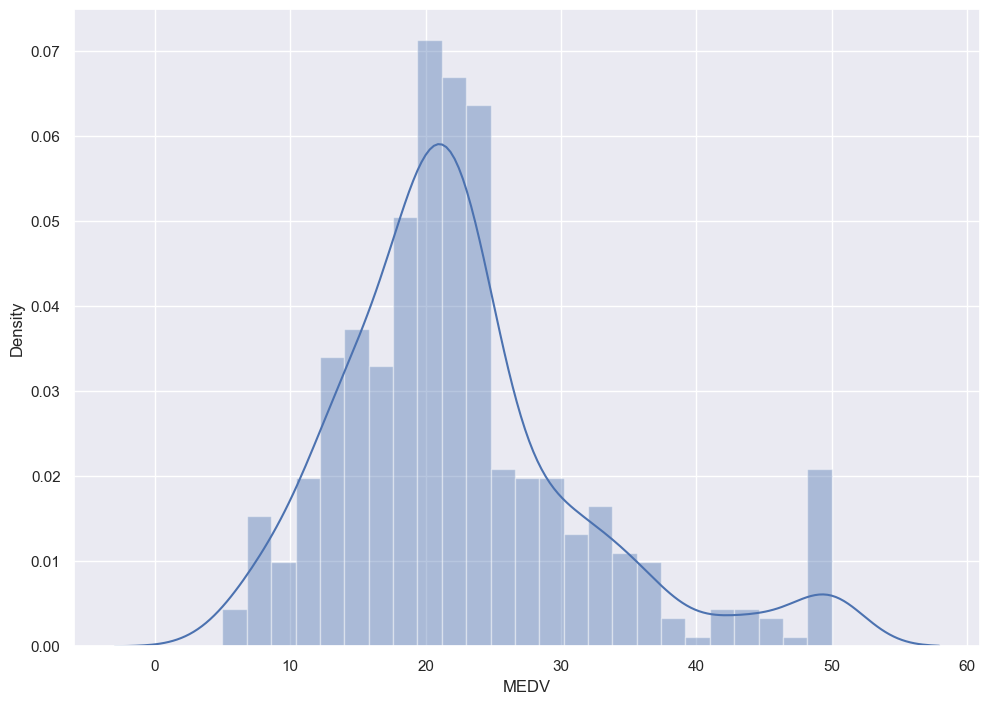

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston["MEDV"], bins = 25)
plt.show()

As you can see, our target variable __MEDV__ follows a normal distribution. However, there are outliers near the upper quantiles.

One of the most important steps in modeling is understanding the relationship our variables have with each other.  A relationship between two variables is also denoted as correlation is statistics.  A figure known as a correlation matrix, can be used to measure the linear relationships between variables.

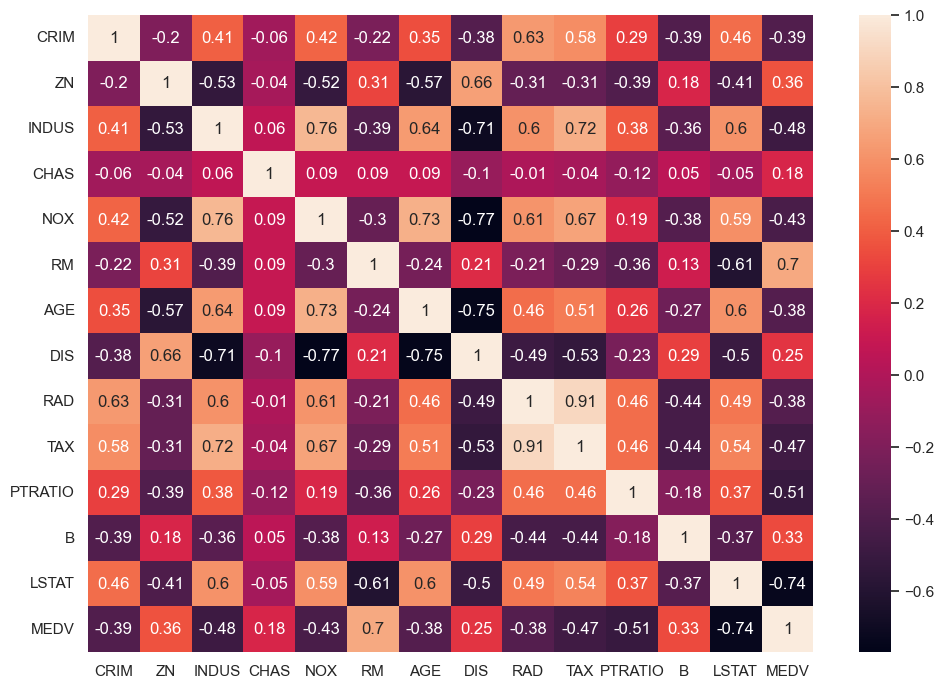

In [7]:
correlation_matrix = boston.corr().round(2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**Correlation coefficients range from -1 to 1, which determines the strength of correlation.  Values close to 1 signify a strong positive relationship, whereas values close to -1 indicate a strong negative relationship.**

With this heatmap, we can see corellation coefficients for each of our potential predictors values and __MEDV__, our target values.  Interestingly, our initial gut instincts of __RM__ and __CRIM__.  __RM's__ coefficient is 0.7, and __CRIM's__ is -0.39, signifying a postive and negative relationship as suggested.

To further investigate individual predictors, we can plot their values against the value of __MEDV__.  This with allow us to infer whether or not the relationship is linear, or if further transformations are required.

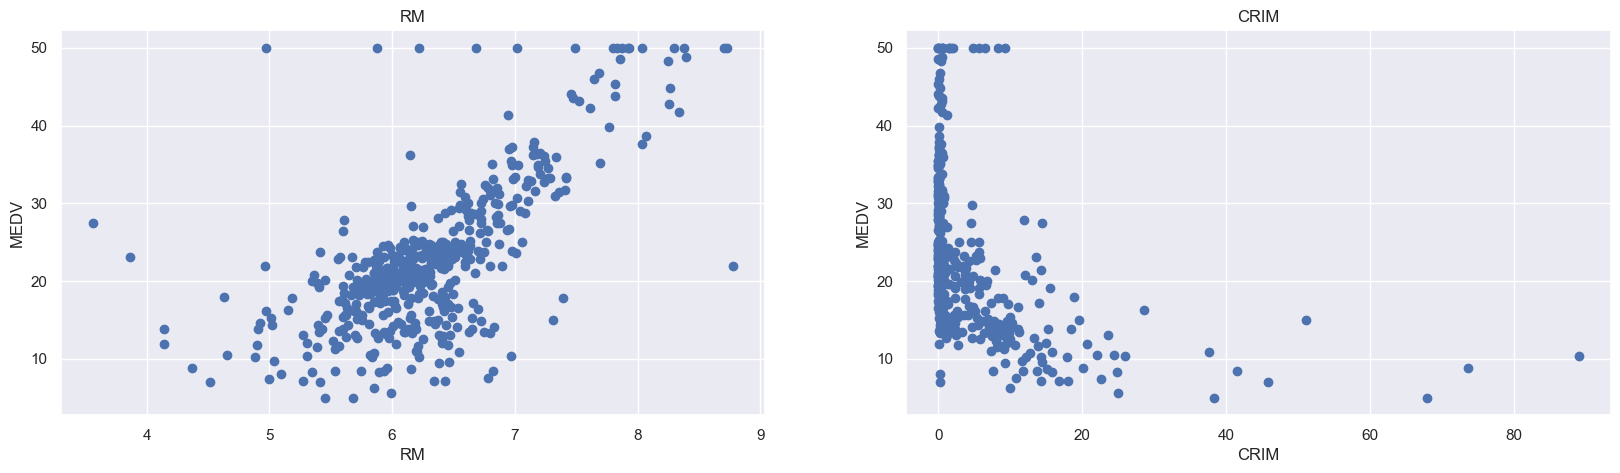

In [8]:
plt.figure(figsize=(20, 5))

features = ['RM', 'CRIM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Here we can see that our relationship between __RM__ and __MEDV__ is very linear which suggests we do not need to do any further manipulation of our data.  However, our plot of __CRIM__ and __MEDV__ is extremely skewed.  Notice that there little separation between our __CRIM__ values.  There is a cluster of values between 0 and 20.

When thinking about linear models, we can do transformations that manipulate our data so that our variables have stronger linear relationships.  

One common transformation is the __log transformation__, which _stretches_ our values out.  This can be shown below:

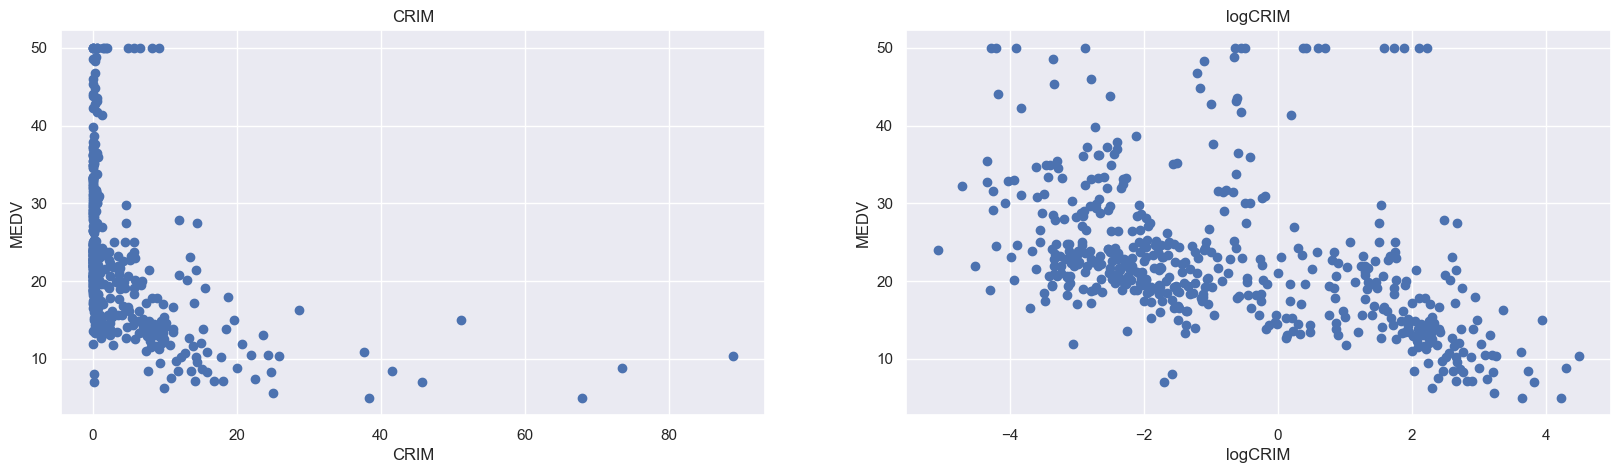

In [9]:
plt.figure(figsize=(20, 5))

boston["logCRIM"] = np.log(boston["CRIM"])

features = ['CRIM', 'logCRIM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

The plots above show a before and after where the log transformation is applied to __CRIM__.  On the righthand side, we can see that there is a drastic difference in the separation of our values and the negative linear correlation between __MEDV__ and __logCRIM__ is more apparent than between __MEDV__ and __CRIM__ (without the log transformation).

Now that we have identified some potential predictors for our model and have throughly investigated their relationship with our target variable, we can begin constructing a model, however thats going to be all for this notebook.  These topics will be discussed in more detail in the coming weeks and you will have the opportunity to read case studies and practice developing models on your own in python!

If you have some extra time this week and would like to practice, feel free to use this notebook as a template for carrying out your own exploratory analysis on a dataset of your choice.  

Getting in the mindset of exploring data and visualizing relationships between variables will pay dividends for the rest of the course as we delve further into fitting statistical models to data with python!